In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv('soda_mentos_results.csv')

In [45]:
cols = ['Temperature','Soda','Mentos', 'Replicate']

for col in cols:
    data[col] = data[col].astype('category')

### Conditional on Temperature

In [46]:
pd.DataFrame(data.groupby('Temperature')['Outcome'].mean())

,Outcome
Temperature,
Cold,1908.00
Warm,1308.75


### Conditional on Soda

In [30]:
pd.DataFrame(data.groupby('Soda')['Outcome'].mean())

,Outcome
Soda,
Diet,1469.50
Regular,1747.25


### Conditional on Mentos (Amount)

In [9]:
pd.DataFrame(data.groupby('Mentos')['Outcome'].mean())

,Outcome
Mentos,
2,1712.25
5,1504.50


### Conditional on Replicate

In [10]:
pd.DataFrame(data.groupby('Replicate')['Outcome'].mean())

,Outcome
Replicate,
a,1624.625
b,1592.125


### Averages over Replicates

In [41]:
temp_data = data.groupby(['Temperature', 'Soda', 'Mentos'])['Outcome'].mean()

In [45]:
temp_data.reset_index()

,Temperature,Soda,Mentos,Outcome
0,Cold,Diet,2,1883.0
1,Cold,Diet,5,1664.5
2,Cold,Regular,2,2100.0
3,Cold,Regular,5,1984.5
4,Warm,Diet,2,1255.5
5,Warm,Diet,5,1075.0
6,Warm,Regular,2,1610.5
7,Warm,Regular,5,1294.0


### Box Plot of each Treatment

In [23]:
temp = data[['Temperature', 'Outcome']].rename(columns = {'Temperature':'Treatment'})
soda = data[['Soda', 'Outcome']].rename(columns = {'Soda':'Treatment'})
mentos = data[['Mentos', 'Outcome']].rename(columns = {'Mentos':'Treatment'})
melt_data = temp.append(soda).append(mentos)
melt_data = melt_data.reset_index()

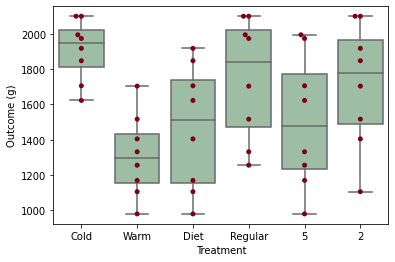

In [24]:
import seaborn as sns
#df_melt = pd.melt(temp_data.reset_index(), id_vars = ['Outcome'], value_vars=[['Temperature', 'Soda', 'Mentos']])
# replace column names
#df_melt.columns = ['treatments', 'Outcome']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments

ax = sns.boxplot(x='Treatment', y='Outcome', data=melt_data, color='#99c2a2')
ax = sns.swarmplot(x="Treatment", y="Outcome", data=melt_data, color='#7d0013')
plt.ylabel('Outcome (g)')
plt.show()

### Conditional on Temperature and Replicate 

In [19]:
pd.DataFrame(data.groupby(['Temperature', 'Replicate'])['Outcome'].mean())

Outcome
Temperature Replicate         
Cold        a          1912.25
            b          1903.75
Warm        a          1337.00
            b          1280.50

### Linear Regression

In [36]:
import statsmodels.api as sm

In [80]:
data['Mentos_5'] = 1*(data["Mentos"] == 5) 

In [96]:
new_data = pd.get_dummies(data.drop(['Treatment'], axis = 1)).drop(['Outcome', 'Temperature_Cold', 'Soda_Regular', 'Replicate_a', 'Mentos', 'Order', 'Replicate_b'], axis = 1)
y = data['Outcome'] # 

In [99]:
# Create Interactions
new_data["Soda_Temperature"] = new_data["Soda_Diet"]*new_data["Temperature_Warm"]
new_data["Soda_Mentos"] = new_data["Soda_Diet"]*new_data["Mentos_5"]
new_data["Mentos_Temperature"] = new_data["Mentos_5"]*new_data["Temperature_Warm"]
new_data["Soda_Temperature_Mentos"] = new_data["Soda_Diet"]*new_data["Temperature_Warm"]*new_data["Mentos_5"]

In [100]:
# Dummify Mentos and create interactions, check which ones are signficant and update slide
X = new_data#[['Soda_Diet', 'Temperature_Cold', 'Mentos_5']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     24.83
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           8.04e-05
Time:                        18:53:10   Log-Likelihood:                -91.715
No. Observations:                  16   AIC:                             199.4
Df Residuals:                       8   BIC:                             205.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

C:\Users\mathe\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [63]:
data

,Temperature,Soda,Mentos,Outcome,Treatment,Replicate,Order
0,Cold,Diet,5,1706,A,a,1
1,Cold,Diet,5,1623,A,b,2
2,Warm,Regular,5,1256,F,a,3
3,Cold,Regular,5,1995,C,a,4
4,Cold,Regular,2,2100,D,a,5
5,Cold,Regular,5,1974,C,b,6
6,Cold,Regular,2,2100,D,b,7
7,Cold,Diet,2,1848,B,a,8
8,Cold,Diet,2,1918,B,b,9
9,Warm,Regular,5,1332,F,b,10


In [27]:
# Regression with Interactions
# Note: As you add dof to the error (removing interactions between Soda and others), Soda becomes significant
from statsmodels.formula.api import ols
model = ols('Outcome ~ Temperature + Soda + Mentos + Temperature*Mentos + Soda*Mentos + Temperature*Soda + Temperature*Soda*Mentos', data=data).fit()
model.summary()

C:\Users\mathe\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     33.97
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           4.38e-05
Time:                        15:47:32   Log-Likelihood:                -106.85
No. Observations:                  16   AIC:                             217.7
Df Residuals:                      14   BIC:                             219.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1908.0000     72.703     26.244      0.000    1752.068    2063.932
Temperature[T.Warm]  -599.2500    102.817     -5.828      0.000    -819.771    -378.729
==============================================================================
Omnibus:                        0.087   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.308
Skew:                           0.075   Prob(JB):                        0.857
Kurtosis:                       2.337   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ANOVA Table

In [29]:
# Mentos not signficant
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=data, res_var='Outcome', anova_model='Outcome ~ Temperature + Soda + Mentos + Replicate + Order')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
Temperature,1.0,528012.867902,528012.867902,56.399959,0.000020
Soda,1.0,320940.002051,320940.002051,34.281367,0.000161
Replicate,1.0,13895.913177,13895.913177,1.484299,0.251066
Mentos,1.0,41088.063519,41088.063519,4.388842,0.062606
Order,1.0,12930.628876,12930.628876,1.381192,0.267122
Residual,10.0,93619.371124,9361.937112,NaN,NaN


In [5]:
# Why does Mentos become significant now?
res = stat()
res.anova_stat(df=data, res_var='Outcome', anova_model='Outcome ~ Temperature + Soda + Mentos')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
Temperature,1.0,1436402.25,1436402.25,155.602139,3.136818e-08
Soda,1.0,308580.25,308580.25,33.427786,8.719593e-05
Mentos,1.0,172640.25,172640.25,18.701720,9.881565e-04
Residual,12.0,110775.00,9231.25,NaN,NaN


In [6]:
res = stat()
res.anova_stat(df=data, res_var='Outcome', anova_model='Outcome ~ Temperature + Soda + Mentos + Temperature*Mentos + Soda*Mentos + Temperature*Soda + Temperature*Soda*Mentos')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
Temperature,1.0,1436402.25,1436402.25,128.770457,0.000003
Soda,1.0,308580.25,308580.25,27.663574,0.000765
Temperature:Soda,1.0,342.25,342.25,0.030682,0.865304
Mentos,1.0,172640.25,172640.25,15.476837,0.004332
Temperature:Mentos,1.0,6642.25,6642.25,0.595464,0.462497
Soda:Mentos,1.0,272.25,272.25,0.024407,0.879725
Temperature:Soda:Mentos,1.0,14280.25,14280.25,1.280195,0.290637
Residual,8.0,89238.00,11154.75,NaN,NaN


### QQPlot

In [13]:
data

,Temperature,Soda,Mentos,Outcome,Treatment,Replicate,Order
0,Cold,Diet,5,1706,A,a,1
1,Cold,Diet,5,1623,A,b,2
2,Warm,Regular,5,1256,F,a,3
3,Cold,Regular,5,1995,C,a,4
4,Cold,Regular,2,2100,D,a,5
5,Cold,Regular,5,1974,C,b,6
6,Cold,Regular,2,2100,D,b,7
7,Cold,Diet,2,1848,B,a,8
8,Cold,Diet,2,1918,B,b,9
9,Warm,Regular,5,1332,F,b,10


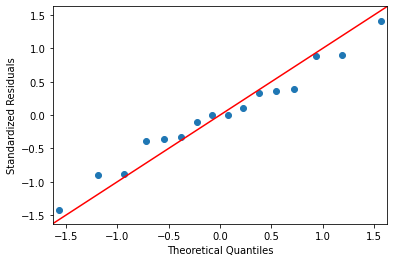

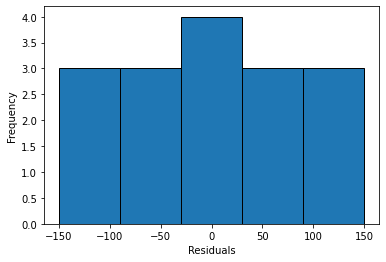

In [9]:
# Should we not be seeing more anorality for some treatments?
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()